# Introduction to regression and classificiation

### Imports for this lesson

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# for typing
import numpy.typing as npt
from typing import Tuple

## Linear Regression

In [2]:
# load dataset
X = np.loadtxt("data/linear_regression/weight.csv", delimiter=",")
y = np.loadtxt("data/linear_regression/height.csv", delimiter=",")
print(f"First 5 weights: {X[:5]}")
print(f"First 5 heights: {y[:5]}")

First 5 weights: [109.72098511  73.62273185  96.49755015  99.80950419  93.59861876]
First 5 heights: [1.87571423 1.74706036 1.88239668 1.82196685 1.77499761]


In [3]:
class LinearRegression:
    """Linear regression class.

    Args:
        slope_0: initial slope.
        intercept_0: initial intercept.
    """
    def __init__(self, slope_0: float, intercept_0: float):
        self.slope_0 = slope_0
        self.intercept_0 = intercept_0

    def fit(self,X: npt.NDArray,y: npt.NDArray, learning_rate: float, 
            epochs:float) ->Tuple[float, float]:
        """ Implements standard gradient descent to fit training data.

        Args:
            X: data samples.
            y: data targets.
            learning_rate: learning rate for the gradient descent algorithm.
            epochs: number of iterations.

        Returns:
            a tuple containing the best slope and intercept founded so far.
        """
        #X=np.array(X).reshape(-1,1)
        #y=np.array(y).reshape(-1,1)
        #initialize weight and intercept
        self.slope = self.slope_0
        self.intercept = self.intercept_0
        self.error = []

        for i in range(epochs):
            self.dcostdm =  np.sum(np.multiply(((self.slope*X+
                                                 self.intercept)-y),X))*2/X.shape[0]
            self.dcostdc = np.sum(((self.slope*X+self.intercept)-y))*2/X.shape[0]            
            self.slope -= learning_rate*self.dcostdm 
            self.intercept -= learning_rate*self.dcostdc
            training_prediction = self.predict(X)
            error = self.compute_error(training_prediction, y)
            # error = np.sum((training_prediction - y)**2)/X.shape[0]
            self.error.append(error)
    
        return self.slope,self.intercept

    def compute_error(self, prediction: npt.NDArray, y:npt.NDArray)->float:
        return np.linalg.norm(prediction - y)**2/prediction.shape[0]

    def predict(self,X: npt.NDArray) -> npt.NDArray:
        """ Perform a prediction given input data. 

        Args:
            X: data samples.

        Returns:
            the prediction.
        """
        #product =  np.matmul(np.array(X).reshape(-1,1),self.slope)+self.intercept
        product =  self.slope*X+self.intercept
        return product

In [4]:
# shuffling the dataset
np.random.seed(42)
data = np.c_[X,y]
np.random.shuffle(data)
X_shuffled, y_shuffled = data[:,0], data[:,1]

In [5]:
#standardization of the dataset
mean_weight = np.mean(X_shuffled)
std_weight = np.std(X_shuffled)
mean_height = np.mean(y_shuffled)
std_height = np.std(y_shuffled)
X_norm = (X_shuffled-mean_weight)/std_weight
y_norm = (y_shuffled-mean_height)/std_height

In [6]:
# train-test splitting
X_train=X_norm[:180]
X_test=X_norm[180:240]
y_train=y_norm[:180]
y_test=y_norm[180:240]

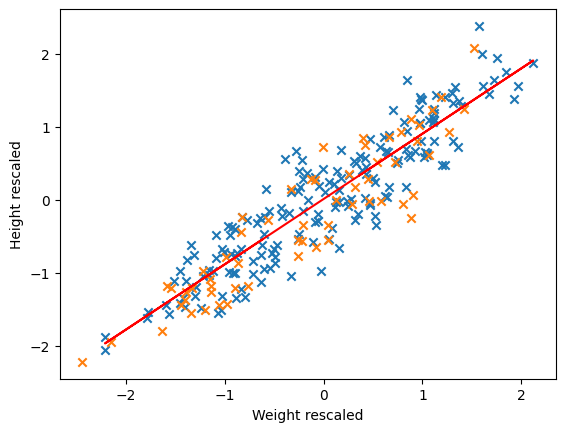

(0.8941031442691002, 0.012893006779845407)


In [7]:
#slope_0 = np.random.normal(-1,1,(1,1))
slope_0 = np.random.normal(-1,1)
intercept_0 = np.random.rand(1)[0]

lr = LinearRegression(slope_0, intercept_0)
params = lr.fit(X_train,y_train, 0.1,50)
plt.scatter(X_train,y_train, marker="x")
pred = lr.predict(X_train)
plt.plot(X_train,pred,'r')
plt.scatter(X_test, y_test, marker="x")
plt.xlabel("Weight rescaled")
plt.ylabel("Height rescaled")
plt.show()
print(params)

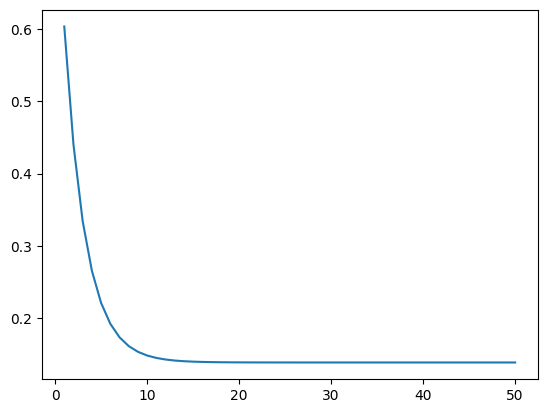

In [8]:
# learning curve
plt.plot(np.arange(1,len(lr.error)+1,1),lr.error)
plt.show()

In [9]:
# test set error
test_pred = lr.predict(X_test)
lr.compute_error(test_pred, y_test)

0.1486132732586686

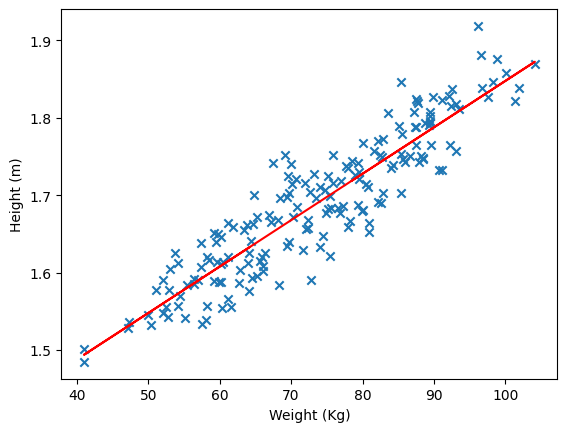

In [11]:
plt.scatter(X_shuffled[:180],y_shuffled[:180], marker="x")
new_m = std_height*params[0]/std_weight
new_q = params[1]*std_height - params[0]*std_height*mean_weight/std_weight + mean_height
pred_train = new_m*X_shuffled[:180]+new_q
plt.plot(X_shuffled[:180],pred_train,'r')
plt.xlabel("Weight (Kg)")
plt.ylabel("Height (m)")
plt.show()

## Logistic Regression

### A toy example

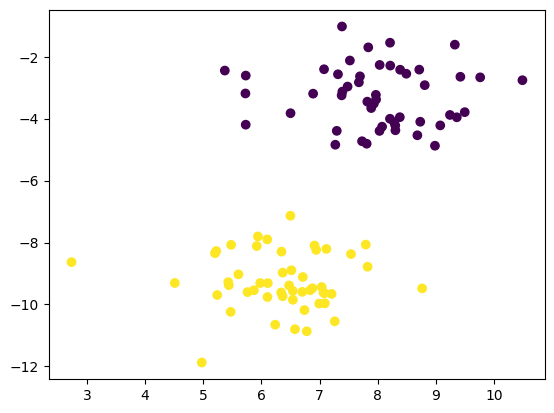

In [7]:
# load data
X = np.loadtxt("data/logistic_regression/toy_logistic_X.csv", delimiter = ",")
y = np.loadtxt("data/logistic_regression/toy_logistic_y.csv", delimiter = ",")
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
#FIXME: improve documentation and names
class LogisticRegression:
    
    def __init__ (self,num_iterations,learning_rate,random_state):
        
        self.num_iterations=num_iterations 
        self.learning_rate=learning_rate # learning rate
        self.random_state=random_state # random_state for weights generation
        
    def fit (self,X,y): # weights update process and cost monitoring 
        
        # for initial weights assignment I use numpy.random.RandomState which is a
        # container with number of methods for random numbers generation
        # drawn from a variety of probability distributions
        
        rgen=np.random.RandomState(self.random_state)
        
        # weights initialisation
        # normal (Gaussian) distribution is used with mean equals to 0.0 and std to 0.01 and size
        # corresponding to number of features + bias (intercept)
        
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=X.shape[1]+1)
        
        self.cost_=[]
        
        for i in range(self.num_iterations):
            
            output=(self.sigmoid(self.dot_product(X)))
            
            errors=(y-output) # error calculation
            
            self.w_[:2]+=self.learning_rate*X.T.dot(errors) # weights update process
            
            self.w_[2]+=self.learning_rate*errors.sum()
            
            cost = (-y.dot(np.log(output))-((1 - y).dot(np.log(1 - output)))) # cost function
            
            self.cost_.append(cost)
        
        return self
        
    def dot_product (self,X): 
        
        return np.dot(X,self.w_[:2])+self.w_[2]
        
    def sigmoid (self,z): # Sigmoid function
        
        return 1/(1+np.exp(-z))
        
    def predict (self,X): # Prediction function using np.where
        
        return np.where(self.sigmoid(self.dot_product(X))>=0.5,1,0)

In [9]:
X_train=X[:70]
X_test=X[70:]
y_train=y[:70]
y_test=y[70:]

print('mean_1:',X_train[:,0].mean(),X_test[:,0].mean())

print('mean_2:',X_train[:,1].mean(),X_test[:,1].mean())

mean_1: 7.241673064381469 6.989228461123589
mean_2: -6.090926073052087 -6.722102294328063


In [10]:
lr=LogisticRegression(n_iter=1000,l_rate=0.001,random_state=1)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
print('Misclassifications:',(y_test!=y_pred).sum())

Misclassifications: 0


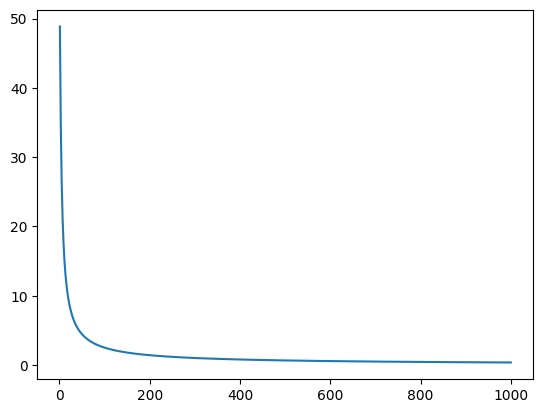

In [11]:
# Ploting cost value vs number of iterations
plt.plot(np.arange(1,len(lr.cost_)+1,1),lr.cost_)

In [12]:
# Finding slope and intercept for decission line ploting
slope=(0-(-lr.w_[2]/lr.w_[1]))/(-lr.w_[2]/lr.w_[0])
intercept=-lr.w_[2]/lr.w_[1]

print('slope:',slope,'intercept:',intercept)

slope: -0.8549748437092233 intercept: -0.08589867124742837


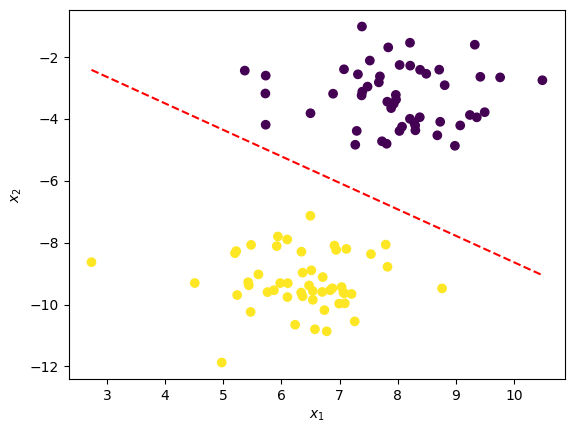

In [14]:
# Drawing decision boundary over the entire dataset
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(np.linspace(X[:,0].min(),X[:,0].max(),100),
        (np.linspace(X[:,0].min(),X[:,0].max(),100))*slope+intercept,'r--')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()